In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import *
from iris.analysis.cartography import *
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

In [3]:
fname = '/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_models/siconc_SImon_GFDL-CM4_piControl_r1i1p1f1_gr_015101-025012.nc'
siconc = iris.load_cube(fname)
print(siconc)

sea_ice_area_fraction / (%)         (time: 1200; latitude: 180; longitude: 360)
    Dimension coordinates:
        time                             x               -               -
        latitude                         -               x               -
        longitude                        -               -               x
    Cell methods:
        mean where sea              area
        mean                        time
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 CMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       54750.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-02-03T16:22:06Z
        data_specs_version          01.00.27
        experiment                

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(


In [4]:
# three coords time, lat, lon
lat_long_data_from_1st_time_step = siconc[0,:,:]
lat_long_data_from_2nd_time_step = siconc[2,:,:]
time_long_data_from_1st_latitude_step = siconc[:,0,:]
time_lat_data_from_1st_litudeong_step = siconc[:,:,0]
siconc_at_time_zero = siconc[0,:,:]
print(siconc_at_time_zero)

sea_ice_area_fraction / (%)         (latitude: 180; longitude: 360)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        time                        0151-01-16 12:00:00, bound=(0151-01-01 00:00:00, 0151-02-01 00:00:00)
    Cell methods:
        mean where sea              area
        mean                        time
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 CMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       54750.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-02-03T16:22:06Z
        data_specs_version          01.00.27
        experim

In [5]:
#extract Jan and Dec to average the sea ice concentration across these months

add_month_number(siconc, 'time', name='month_number')
cube2 = siconc[np.where((siconc.coord('month_number').points == 12) |(siconc.coord('month_number')==1))]

#then to average this by each year, so that you have the December-Jan for each year add the 'season year', i.e. a number of each 'season'
add_season_year(cube2, 'time', name='season_year')

#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)

<iris 'Cube' of sea_ice_area_fraction / (%) (time: 100; latitude: 180; longitude: 360)>

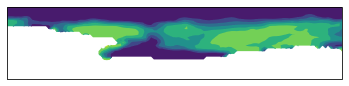

In [34]:
#identify the Ross Sea

cube3=cube2[0,:,:]

west = -230 
east = -110 
south = -85 
north = -60
temporary_cube = cube3.intersection(longitude = (west, east)) 
regional_cube = temporary_cube.intersection(latitude = (south, north))
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0))) 
my_plot = iplt.contourf(regional_cube)
plt.show()

In [57]:
# most northerly row of cells and have a criteria like the average sea ice concentration in this 
# row is > 80% (might need some testing/iterating to find the right number).
average_across_time = regional_cube.collapsed(['latitude'],MEAN)
print(average_across_time)

print(average_across_time.data)

sea_ice_area_fraction / (%)         (longitude: 122)
    Dimension coordinates:
        longitude                             x
    Scalar coordinates:
        latitude                    -72.5 degrees, bound=(-86.0, -59.00000000000001) degrees
        month_number                12
        season_year                 152
        time                        0151-12-16 12:00:00, bound=(0151-12-01 00:00:00, 0152-01-01 00:00:00)
    Cell methods:
        mean where sea              area
        mean                        time
        mean                        latitude
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 CMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       54750.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@no

In [51]:
polynya_threshold = regional_cube.data
print(polynya_threshold)

if polynya_threshold  > 30 :
    qplt.pcolormesh
    


[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [0.6105682253837585 0.1939946413040161 0.24421122670173645 ...
  6.514014239655808e-05 6.894061698403675e-06 5.97550933889579e-05]
 [0.9352998733520508 0.1906755566596985 0.08723506331443787 ...
  1.0912697412379657e-08 4.3972372115392216e-17 3.7900844978731515e-15]
 [0.061249028891325 0.032659515738487244 0.016030170023441315 ... 0.0 0.0
  0.0]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [38]:

if polynya_threshold < 30:
    print('this statement is true')
elif 
    
if my_data < 30: 
    print(okay) if
elif and surrounded by siconc of 80 :
    print(colormesh) of elif
else: 
    dont print of else

SyntaxError: invalid syntax (1669717289.py, line 5)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [0.6105682253837585 0.1939946413040161 0.24421122670173645 ...
  6.514014239655808e-05 6.894061698403675e-06 5.97550933889579e-05]
 [0.9352998733520508 0.1906755566596985 0.08723506331443787 ...
  1.0912697412379657e-08 4.3972372115392216e-17 3.7900844978731515e-15]
 [0.061249028891325 0.032659515738487244 0.016030170023441315 ... 0.0 0.0
  0.0]]


NameError: name 'lowcut' is not defined

In [11]:
coord = siconc.coord('time')
date_variable = array([coord.units.num2date(value).year for value in coord.points])
print(date_variable)

[151 151 151 ... 250 250 250]


In [ ]:
jandec=cube2.coord('latitude').points
print(jandec)